# SG Census 

In [9]:
# Import Libraries

#System
import os
import re
import requests
import json

# Data Manipulation
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import shape

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd


 Data.gov.sg maintains a dataset titled 'Resident Population by Planning Area/Subzone of Residence, Ethnic Group and Sex (Census of Population 2020)', where the data can be retrieved via API query:

[Data.gov.sg](https://data.gov.sg/datasets/d_e7ae90176a68945837ad67892b898466/view?dataExplorerPage=39)

From the available data explorer there are 388 records (Last updated March 2025)

### Loading Census Data 
Resident Population by Planning Area/Subzone of Residence, Ethnic Group and Sex (Census of Population 2020)

In [3]:
# OpenAPI query from data.gov.sg

# Dataset ID
dataset_id = "d_e7ae90176a68945837ad67892b898466"
base_url = "https://data.gov.sg/api/action/datastore_search"

# Pagination setup
limit = 1000  # max limit per request
offset = 0
all_records = []

# Request response
while True:
    url = f"{base_url}?resource_id={dataset_id}&limit={limit}&offset={offset}"
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        records = data['result']['records']
        
        if not records:
            break  # No more data - end 

        all_records.extend(records)
        print(f"Fetched {len(all_records)} records so far...")

        offset += limit
    else:
        print("Error:", response.status_code)
        break

# Export to DataFrame
df = pd.DataFrame(all_records)
print(f"\n✅ Total records fetched: {len(df)}")


Fetched 388 records so far...

✅ Total records fetched: 388


In [4]:
#Dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   _id              388 non-null    int64 
 1   Number           388 non-null    object
 2   Total_Total      388 non-null    object
 3   Total_Males      388 non-null    object
 4   Total_Females    388 non-null    object
 5   Chinese_Total    388 non-null    object
 6   Chinese_Males    388 non-null    object
 7   Chinese_Females  388 non-null    object
 8   Malays_Total     388 non-null    object
 9   Malays_Males     388 non-null    object
 10  Malays_Females   388 non-null    object
 11  Indians_Total    388 non-null    object
 12  Indians_Males    388 non-null    object
 13  Indians_Females  388 non-null    object
 14  Others_Total     388 non-null    object
 15  Others_Males     388 non-null    object
 16  Others_Females   388 non-null    object
dtypes: int64(1), object(16)
memory usag

In [5]:
df

,_id,Number,Total_Total,Total_Males,Total_Females,Chinese_Total,Chinese_Males,Chinese_Females,Malays_Total,Malays_Males,Malays_Females,Indians_Total,Indians_Males,Indians_Females,Others_Total,Others_Males,Others_Females
0,1,Total,4044210,1977560,2066650,3006770,1461340,1545430,545500,271330,274170,362270,185570,176710,129670,59320,70350
1,2,Ang Mo Kio - Total,162280,77570,84700,134350,64050,70300,11140,5480,5660,12810,6350,6470,3970,1690,2280
2,3,Ang Mo Kio Town Centre,4810,2260,2550,4140,1950,2200,140,60,80,370,170,200,160,80,80
3,4,Cheng San,28070,13480,14600,23240,11120,12120,1940,960,980,2280,1150,1130,610,250,370
4,5,Chong Boon,26500,12860,13640,21860,10590,11270,1830,920,900,2240,1130,1110,580,220,360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,384,Springleaf,4370,2180,2190,4010,2000,2010,40,20,20,220,110,100,110,50,60
384,385,Yishun Central,2620,1290,1340,2300,1130,1170,140,70,80,140,70,70,50,20,30
385,386,Yishun East,60670,30030,30640,40290,19960,20330,12670,6260,6410,6110,3160,2940,1600,650,950
386,387,Yishun South,42240,20670,21580,30680,15000,15680,6230,3100,3130,4230,2130,2090,1110,440,670


In [25]:
df.head(15)

,_id,Number,Total_Total,Total_Males,Total_Females,Chinese_Total,Chinese_Males,Chinese_Females,Malays_Total,Malays_Males,Malays_Females,Indians_Total,Indians_Males,Indians_Females,Others_Total,Others_Males,Others_Females
0,1,Total,4044210,1977560,2066650,3006770,1461340,1545430,545500,271330,274170,362270,185570,176710,129670,59320,70350
1,2,Ang Mo Kio - Total,162280,77570,84700,134350,64050,70300,11140,5480,5660,12810,6350,6470,3970,1690,2280
2,3,Ang Mo Kio Town Centre,4810,2260,2550,4140,1950,2200,140,60,80,370,170,200,160,80,80
3,4,Cheng San,28070,13480,14600,23240,11120,12120,1940,960,980,2280,1150,1130,610,250,370
4,5,Chong Boon,26500,12860,13640,21860,10590,11270,1830,920,900,2240,1130,1110,580,220,360
5,6,Kebun Bahru,22620,10660,11970,18710,8780,9930,1820,890,930,1590,780,800,510,210,300
6,7,Sembawang Hills,6850,3210,3650,6100,2850,3250,70,40,40,460,210,250,220,110,110
7,8,Shangri-La,15960,7780,8180,12350,6020,6330,1760,850,900,1480,760,730,370,160,220
8,9,Tagore,7950,3790,4160,7160,3400,3760,70,30,40,500,250,250,220,110,110
9,10,Townsville,21140,9930,11210,17360,8150,9210,1440,710,730,1760,840,920,590,240,350


The above dataset is generally clean with the exception of rounding up of totals which will need to be removed. Several records also indicate subzones which have no resident population and will have to be assessed in conjunction with the subzone boundary in determining which records to retain or modify. 

- General Change of Object Dtype to INT64
- Copy record of dataset totals at index 1 to new df copy
- Copy records which contain additions of subzones E.g. "Ang Mo Kio - Total' to new df copy 

### Loading Geospatial Data
Master Plan 2019 Subzone Boundary (No Sea) (GEOJSON)

In [ ]:
# Dataset ID and poll-download URL
dataset_id = "d_8594ae9ff96d0c708bc2af633048edfb"
base_url = f"https://api-open.data.gov.sg/v1/public/api/datasets/{dataset_id}/poll-download"

# Step 1: Get the actual download URL from poll-download
response = requests.get(base_url)
json_data = response.json()

if json_data['code'] != 0:
    print(json_data['errMsg'])
    exit(1)

download_url = json_data['data']['url']

# Step 2: Download GEOJSON
geo_response = requests.get(download_url)
geojson = geo_response.json()

# Step 3: Extract and flatten features
features = geojson.get("features", [])

# Prepare records and geometries
records = []
geometries = []

for feature in features:
    properties = feature.get("properties", {})
    geometry = feature.get("geometry", {})
    
    records.append(properties)
    geometries.append(shape(geometry))  # Convert to shapely geometry

# Step 4: Create Pandas DataFrame (attributes only)
df_attributes = pd.DataFrame(records)
print(f"✅ Attribute DataFrame created: {len(df_attributes)} rows")

# Step 5: Create GeoDataFrame (attributes + geometry)
gdf = gpd.GeoDataFrame(df_attributes, geometry=geometries, crs="EPSG:4326")
print(f"✅ GeoDataFrame created: {len(gdf)} features")

# Optional preview
print("\nGeoDataFrame preview:")
print(gdf.head())


✅ Attribute DataFrame created: 332 rows
✅ GeoDataFrame created: 332 features

GeoDataFrame preview:
    Name                                        Description  \
0  kml_1  <center><table><tr><th colspan='2' align='cent...   
1  kml_2  <center><table><tr><th colspan='2' align='cent...   
2  kml_3  <center><table><tr><th colspan='2' align='cent...   
3  kml_4  <center><table><tr><th colspan='2' align='cent...   
4  kml_5  <center><table><tr><th colspan='2' align='cent...   

                                            geometry  
0  POLYGON Z ((103.81454 1.28239 0, 103.81774 1.2...  
1  POLYGON Z ((103.82209 1.28049 0, 103.8221 1.28...  
2  POLYGON Z ((103.84375 1.28508 0, 103.844 1.284...  
3  POLYGON Z ((103.84962 1.28412 0, 103.84955 1.2...  
4  POLYGON Z ((103.85253 1.28617 0, 103.85253 1.2...  


In [11]:
df_attributes

,Name,Description
0,kml_1,<center><table><tr><th colspan='2' align='cent...
1,kml_2,<center><table><tr><th colspan='2' align='cent...
2,kml_3,<center><table><tr><th colspan='2' align='cent...
3,kml_4,<center><table><tr><th colspan='2' align='cent...
4,kml_5,<center><table><tr><th colspan='2' align='cent...
...,...,...
327,kml_328,<center><table><tr><th colspan='2' align='cent...
328,kml_329,<center><table><tr><th colspan='2' align='cent...
329,kml_330,<center><table><tr><th colspan='2' align='cent...
330,kml_331,<center><table><tr><th colspan='2' align='cent...


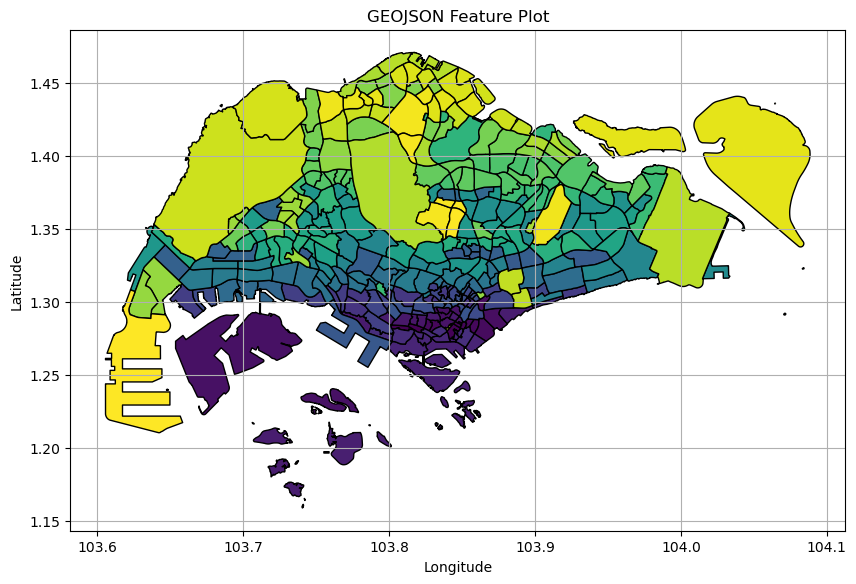

In [12]:
# Plot the GeoDataFrame
gdf.plot(figsize=(10, 10), edgecolor='black', cmap='viridis')

plt.title("GEOJSON Feature Plot")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

In [13]:
import requests
    
url = "https://www.onemap.gov.sg/api/public/popapi/getPlanningareaNames?year=2019"
    
headers = {"Authorization": "**********************"}
    
response = requests.request("GET", url, headers=headers)
    
print(response.text)

{
  "status": 401,
  "message": "Invalid token: Wrong number of segments"
}
